In [589]:
import csv
import functools
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np

df_states = pd.read_csv('daily_data.csv', usecols=[0,1,2,3])
df_us = pd.read_csv('us_daily.csv')
df_race = pd.read_csv('race_data.csv')

def datez(df):
    df['date'] = df['date'].apply(lambda x: pd.to_datetime(x, format='%Y%m%d'))
    return df


In [157]:
df_race.index = df_race.index - 55

In [158]:
df_states.index = df_states.index + 1

In [215]:
df_race.set_index('State', inplace=True)

In [220]:
df_race.sort_values(by=['date'], inplace=True, ascending=True)

In [394]:
df_Black_Deaths = df_race.groupby('State').sum().sort_values('Deaths_Black')
df_LatinX_Deaths = df_race.groupby('State').sum().sort_values('Deaths_LatinX')

**LatinX Deaths from Covid (total = 139,590)**

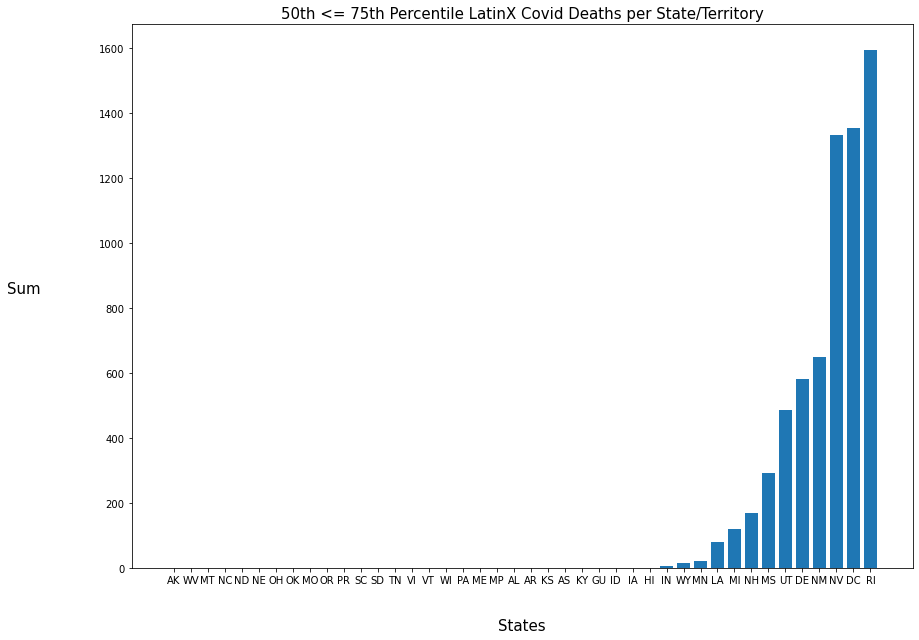

In [397]:
fig, ax = plt.subplots(figsize=(14,10))
ax.bar(x = df_LatinX_deaths_75.index, height=df_LatinX_deaths_75['Deaths_LatinX'])
ax.set_title('50th <= 75th Percentile LatinX Covid Deaths per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum', rotation=0, labelpad=75, fontsize=15)
plt.show()

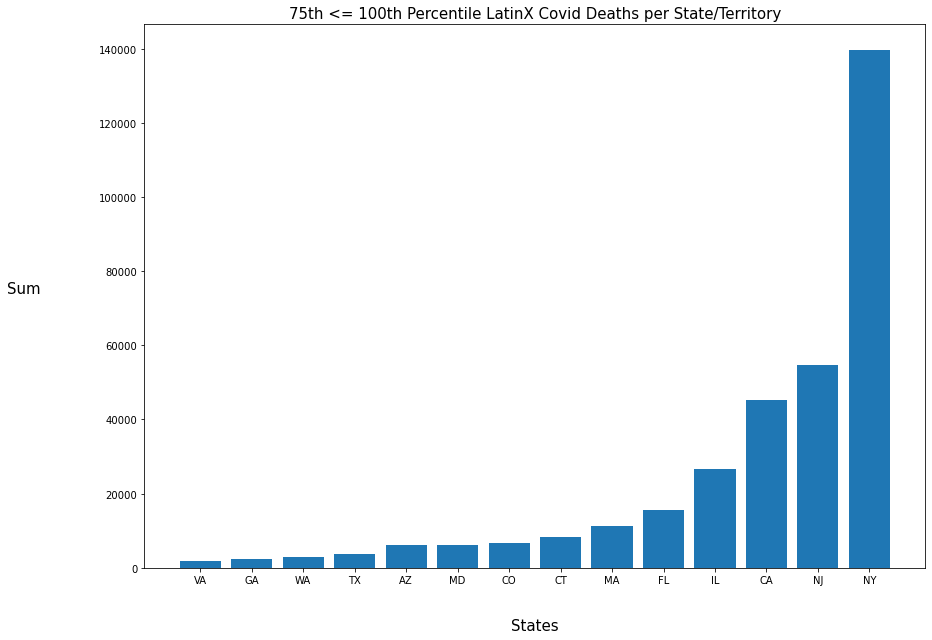

In [398]:
fig, ax = plt.subplots(figsize=(14,10))
ax.bar(x = df_LatinX_deaths_100.index, height=df_LatinX_deaths_100['Deaths_LatinX'])
ax.set_title('75th <= 100th Percentile LatinX Covid Deaths per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum', rotation=0, labelpad=75, fontsize=15)
plt.show()

**Black Deaths from Covid (total = 134,519)**

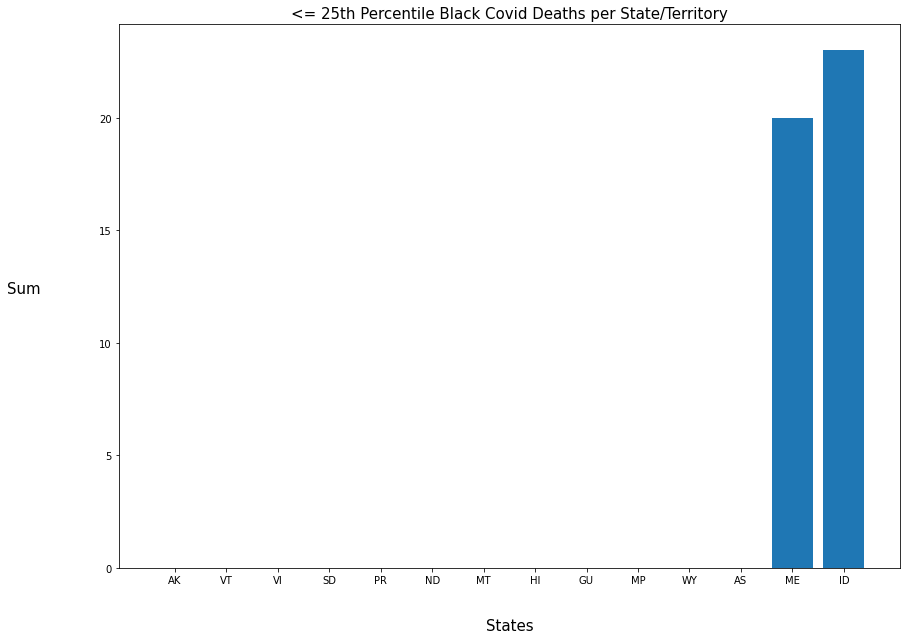

In [399]:
fig, ax = plt.subplots(figsize=(14,10))
ax.bar(x = df_Black_Deaths_25.index, height=df_Black_Deaths_25['Deaths_Black'])
ax.set_title('<= 25th Percentile Black Covid Deaths per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum', rotation=0, labelpad=75, fontsize=15)
plt.show()

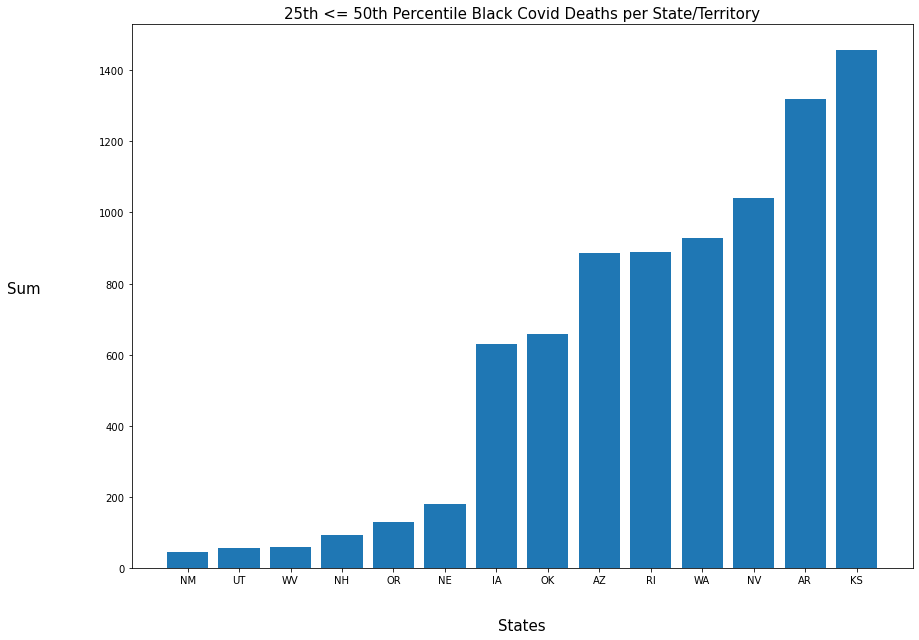

In [400]:
fig, ax = plt.subplots(figsize=(14,10))
ax.bar(x = df_Black_Deaths_50.index, height=df_Black_Deaths_50['Deaths_Black'])
ax.set_title('25th <= 50th Percentile Black Covid Deaths per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum', rotation=0, labelpad=75, fontsize=15)
plt.show()

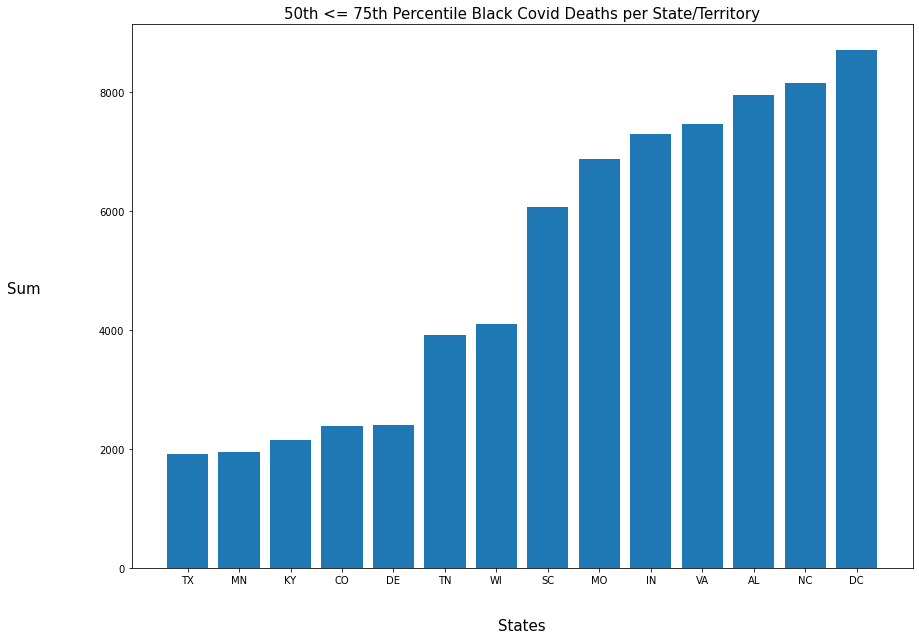

In [401]:
fig, ax = plt.subplots(figsize=(14,10))
ax.bar(x = df_Black_Deaths_75.index, height=df_Black_Deaths_75['Deaths_Black'])
ax.set_title('50th <= 75th Percentile Black Covid Deaths per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum', rotation=0, labelpad=75, fontsize=15)
plt.show()

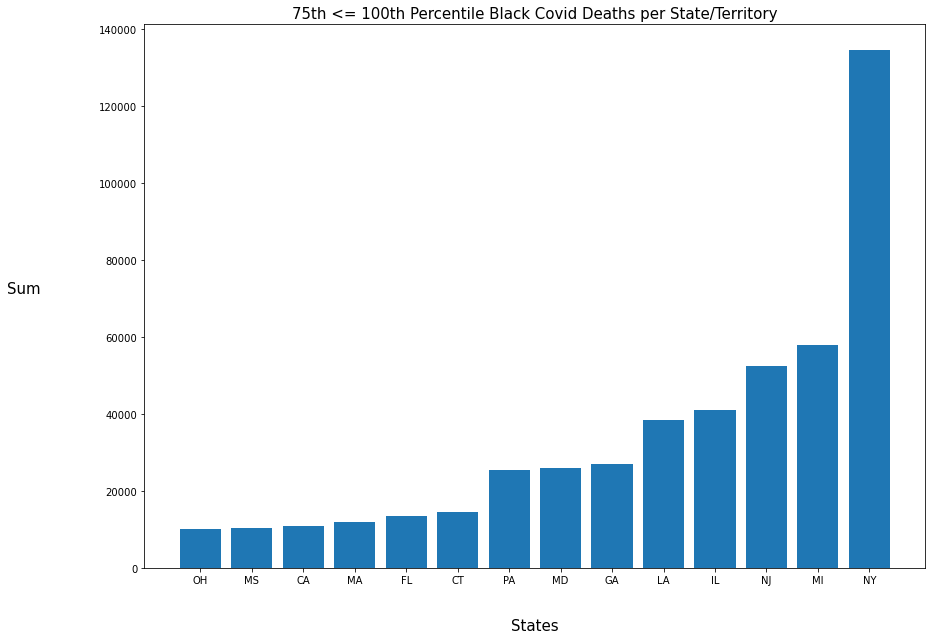

In [402]:
fig, ax = plt.subplots(figsize=(14,10))
ax.bar(x = df_Black_Deaths_100.index, height=df_Black_Deaths_100['Deaths_Black'])
ax.set_title('75th <= 100th Percentile Black Covid Deaths per State/Territory', fontsize=15)
ax.set_xlabel('States', fontsize=15, labelpad=33)
ax.set_ylabel('Sum', rotation=0, labelpad=75, fontsize=15)
plt.show()

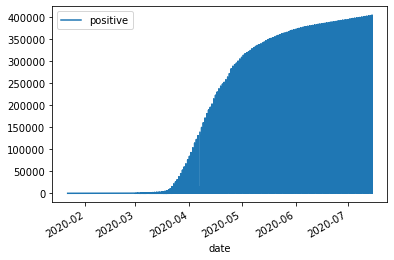

In [410]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily_data.csv', usecols=[0,1,2], header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

In [509]:
df_race['Deaths_Total'].fillna(0, inplace=True)

In [866]:
total_deaths_LatinX_NY = (df_race[df_race.State == 'NY']['Deaths_LatinX'][37]) - (df_race[df_race.State == 'NY']['Deaths_LatinX'][1549])
total_deaths_Black_NY = (df_race[df_race.State == 'NY']['Deaths_Black'][37]) - (df_race[df_race.State == 'NY']['Deaths_Black'][1549])
total_cases_NY = int(df_race[df_race.State == 'NY']['Cases_Total'][37]) - int(df_race[df_race.State == 'NY']['Cases_Total'][1157])
print(total_deaths_LatinX_NY)
print(total_deaths_Black_NY)
print(total_cases_NY)

4546.0
4483.0
71412


In [905]:
#Difference in Sample frequencies 
import scipy as sp
import scipy.stats as stats

# total_deaths_LatinX
# total_deaths_Black
# total_cases_

shared_sample_freq_NY = (total_deaths_LatinX_NY + total_deaths_Black_NY) / (total_cases_NY)
shared_sample_variance_NY = (2 * total_cases_NY) * (shared_sample_freq_NY * (1 - shared_sample_freq_NY)) / (total_cases_NY ** 2)

difference_in_proportions_NY = stats.norm(0, np.sqrt(shared_sample_variance_NY))

Text(0.5, 1.0, 'Distribution of Difference in Sample Frequencies Assuming $H_0$')

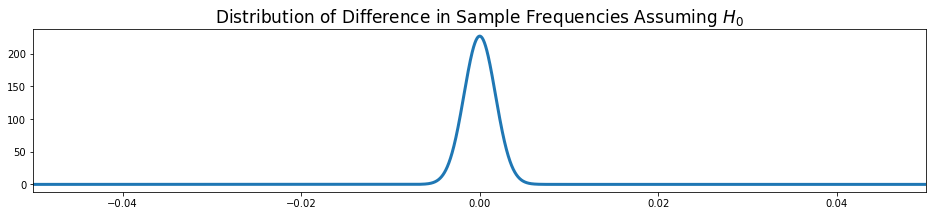

In [907]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=100000)
ax.plot(x, difference_in_proportions_NY.pdf(x), linewidth=3)
ax.set_xlim(-0.05, 0.05)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$", fontsize=17)

In [920]:
black_sample_freq_NY = total_deaths_Black_NY / total_cases_NY
latinX_sample_freq_NY = total_deaths_LatinX_NY / total_cases_NY
difference_in_sample_proportions_NY =  black_sample_freq_NY - latinX_sample_freq_NY
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions_NY))

Difference in sample proportions: -0.00


In [921]:
p_value = (1 - difference_in_proportions_NY.cdf(difference_in_sample_proportions_NY)) / 2
print("p-value for deaths frequency comparison: {:2.2f}".format(p_value))

p-value for deaths frequency comparison: 0.35


ERROR! Session/line number was not unique in database. History logging moved to new session 24


Text(0.5, 1.0, 'p-value Region')

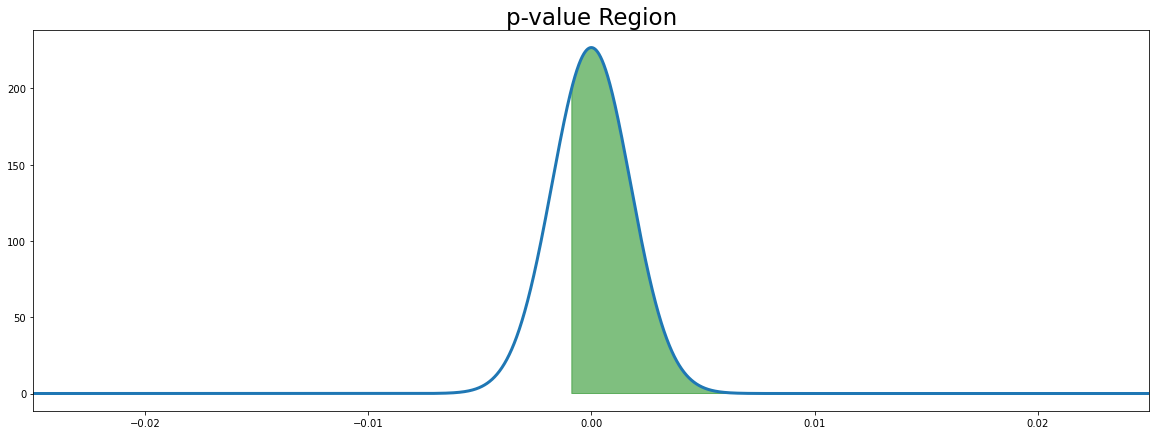

In [927]:
fig, ax = plt.subplots(1, figsize=(20, 7))

x = np.linspace(-0.5, 0.5, num=100000)
ax.plot(x, difference_in_proportions_NY.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions_NY.pdf(x), where=(x >= difference_in_sample_proportions_NY),
                color="green", alpha=0.5)
ax.set_xlim(-0.025, 0.025)
ax.set_title("p-value Region", fontsize=23)

In [873]:
print('I failed to reject my null hypothesis, black deaths compared to cases are not statistically significant when compared to LatinX deaths to cases. ')

I failed to reject my null hypothesis, black deaths compared to cases are not statistically significant when compared to LatinX deaths to cases. 


**Flipped Hypothesis T-Test on Sample Data**

In [915]:
#Difference in Sample frequencies 
import scipy as sp
import scipy.stats as stats

total_deaths_LatinX_CA = (df_race[df_race.State == 'CA']['Deaths_LatinX'][5]) - (df_race[df_race.State == 'CA']['Deaths_LatinX'][1573])
total_deaths_Black_CA = (df_race[df_race.State == 'CA']['Deaths_Black'][5]) - (df_race[df_race.State == 'CA']['Deaths_Black'][1573])
3_day_averages
total_cases_CA = int(df_race[df_race.State == 'CA']['Cases_Total'][5]) - int(df_race[df_race.State == 'CA']['Cases_Total'][1573])

shared_sample_freq_CA_NY = (total_deaths_LatinX_CA + total_deaths_Black_CA + total_deaths_Black_NY + total_deaths_LatinX_NY) / ((2 * total_cases_CA) + (2 * total_cases_NY))
shared_sample_variance_CA_NY = ((2 * total_cases_CA) + (2 * total_cases_NY)) * (shared_sample_freq_CA_NY * (1 - shared_sample_freq_CA_NY)) / ((total_cases_CA + total_cases_NY) ** 2)

difference_in_proportions_CA_NY = stats.norm(0, np.sqrt(shared_sample_variance_CA_NY))

print(shared_sample_variance_CA_NY, shared_sample_freq_CA_NY)

6.70704141503271e-08 0.014783219359443715


Text(0.5, 1.0, 'Distribution of Difference in Sample Frequencies Assuming $H_0$')

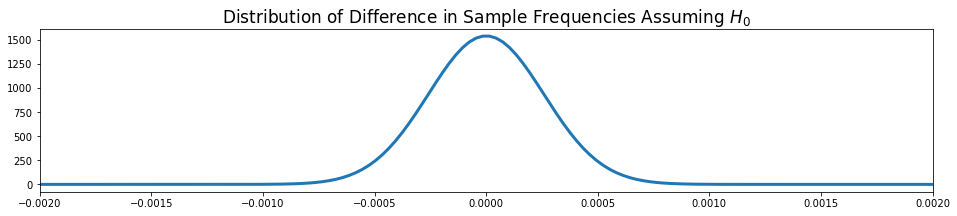

In [916]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1.5, 1.5, num=100000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-0.002, 0.002)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$", fontsize=17)

In [926]:
black_sample_freq_CA_NY = total_deaths_Black_CA + total_deaths_Black_NY / (total_cases_NY + total_cases_CA)
latinX_sample_freq_CA_NY = total_deaths_LatinX_NY + total_deaths_LatinX_CA / (total_cases_NY + total_cases_CA)
difference_in_sample_proportions_CA_NY =  black_sample_freq_CA_NY - latinX_sample_freq_CA_NY
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions_CA_NY))

p_value = (1 - difference_in_proportions_CA_NY.cdf(difference_in_sample_proportions_CA_NY)) / 2

print("p-value for deaths frequency comparison: {:2.2f}".format(p_value))

Difference in sample proportions: -3946.00
p-value for deaths frequency comparison: 0.50
